**Travel salesperson problem using genetic algorithm**

In [ ]:
import matplotlib.pyplot as plt
from itertools import permutations, combinations
import random
import numpy as np
import statistics
import pandas as pd
import seaborn as sns

In [ ]:
cities_coords = {'Gliwice': (0, 1),
                 'Cairo': (3, 2),
                 'Rome': (6, 1),
                 'Krakow': (7, 4.5),
                 'Paris': (15, -1),
                 'Alexandria': (10, 2.5),
                 'Berlin': (16, 11),
                 'Tokyo': (5, 6),
                 'Rio': (8, 9),
                 'Budapest': (1.5, 12)}
cities_names = list(cities_coords.keys())

population_size = 250
crossover_rate = 0.8
mutation_rate = 0.2
number_of_generations = 200

In [ ]:
def initial_population(cities_list, population_size = 250):

  population = []
  possible_permutations = list(permutations(cities_list)) #n! #list of tuples
  random_indices  = random.sample(range(0, len(possible_permutations)), population_size)

  for i in random_indices:
    population.append(list(possible_permutations[i]))

  return population

In [ ]:
def distance_betweeen_two_cities(city1, city2):
  city1_coords = cities_coords[city1]
  city2_coords = cities_coords[city2]
  return np.sqrt(np.sum((np.array(city1_coords) - np.array(city2_coords))**2))

In [ ]:
def total_distance_path(path):
  total = 0
  for i in range(0, len(path)):
    if i == len(path) - 1:
      total += distance_betweeen_two_cities(path[i], path[0])
    else:
      total += distance_betweeen_two_cities(path[i], path[i+1])
  return total

In [ ]:
#Calculate fitness for all individuals (based on inverse of total distance).
#Normalize it to probabilities for roulette wheel selection.
def fitness_probability(population):
  total_distance_all_paths = []
  for i in range(0, len(population)):
    total_distance_all_paths.append(total_distance_path(population[i]))

  max_population_cost = max(total_distance_all_paths)
  total_distance_all_paths = np.array(total_distance_all_paths)
  population_fitness = max_population_cost - total_distance_all_paths
  population_fitness_sum = sum(population_fitness)
  population_fitness_probabilities = population_fitness / population_fitness_sum
  return population_fitness_probabilities

In [ ]:
#Select individuals with higher fitness more likely.
#uses cumulative probability sampling.
#selection
def roulette_wheel(population, fitness_probabilities):
  population_fitness_probs_cumsum = fitness_probabilities.cumsum()
  bool_prob_array = population_fitness_probs_cumsum < np.random.uniform(0,1,1)
  selected_path_index = len(bool_prob_array[bool_prob_array == True]) - 1
  return population[selected_path_index]

In [ ]:
def crossover(parent_1, parent_2):
  cities_names_length = len(cities_names) - 1
  cut_point = round(random.uniform(1, cities_names_length))
  offspring_1 = []
  offspring_2 = []

  offspring_1 = parent_1[0:cut_point]
  offspring_1 += [city for city in parent_2 if city not in offspring_1]

  offspring_2 = parent_2[0:cut_point]
  offspring_2 += [city for city in parent_1 if city not in offspring_2]

  return offspring_1, offspring_2

In [ ]:
def mutation(offspring):
  cities_names_length = len(cities_names) - 1
  index_1 = round(random.uniform(0, cities_names_length))
  index_2 = round(random.uniform(0, cities_names_length))

  temp = offspring[index_1]
  offspring[index_1] = offspring[index_2]
  offspring[index_2] = temp

  return offspring

In [ ]:
def genetic_algorithm(cities_names, population_size, number_of_generations, crossover_rate, mutation_rate):
  population = initial_population(cities_names, population_size)
  fitness_probabilities = fitness_probability(population)

  #selection
  parents_list = []
  for i in range(0, int(crossover_rate * population_size)):
    parents_list.append(roulette_wheel(population, fitness_probabilities))

  offspring_list = []
  for i in range(0, len(parents_list), 2):
    #crossover
    offspring_1, offspring_2 = crossover(parents_list[i], parents_list[i+1])

    #mutation
    mutate_threashold = random.random()
    if(mutate_threashold > (1-mutation_rate)):
      offspring_1 = mutation(offspring_1)

    mutate_threashold = random.random()
    if(mutate_threashold > (1-mutation_rate)):
      offspring_2 = mutation(offspring_2)

    offspring_list.append(offspring_1)
    offspring_list.append(offspring_2)

  mixed_offspring = parents_list + offspring_list

  fitness_probabilities = fitness_probability(mixed_offspring)
  sorted_fitness_indices = np.argsort(fitness_probabilities)[::-1]
  best_fitness_indices = sorted_fitness_indices[0:population_size]

  best_mixed_offsrping = []
  for i in best_fitness_indices:
    best_mixed_offsrping.append(mixed_offspring[i])

  for i in range(0, number_of_generations):
    fitness_probabilities = fitness_probability(best_mixed_offsrping)
    parents_list = []
    for i in range(0, int(crossover_rate * population_size)):
      parents_list.append(roulette_wheel(best_mixed_offsrping, fitness_probabilities))

    offspring_list = []
    for i in range(0,len(parents_list), 2):
      offspring_1, offspring_2 = crossover(parents_list[i], parents_list[i+1])

      mutate_threashold = random.random()
      if(mutate_threashold > (1-mutation_rate)):
        offspring_1 = mutation(offspring_1)

      mutate_threashold = random.random()
      if(mutate_threashold > (1-mutation_rate)):
        offspring_2 = mutation(offspring_2)

      offspring_list.append(offspring_1)
      offspring_list.append(offspring_2)


    mixed_offspring = parents_list + offspring_list
    fitness_probabilities = fitness_probability(mixed_offspring)
    sorted_fitness_indices = np.argsort(fitness_probabilities)[::-1]
    best_fitness_indices = sorted_fitness_indices[0:int(0.8*population_size)]

    best_mixed_offsrping = []
    for i in best_fitness_indices:
      best_mixed_offsrping.append(mixed_offspring[i])

    old_population_indices = [random.randint(0, (population_size - 1)) for j in range(int(0.2*population_size))]
    for i in old_population_indices:
      best_mixed_offsrping.append(population[i])

    random.shuffle(best_mixed_offsrping)

  return best_mixed_offsrping


In [ ]:
best_mixed_offsrping = genetic_algorithm(cities_names, population_size, number_of_generations, crossover_rate, mutation_rate)

In [ ]:
total_distance_all_paths = []
for i in range(0, population_size):
    total_distance_all_paths.append(total_distance_path(best_mixed_offsrping[i]))


In [ ]:
index_minimum = np.argmin(total_distance_all_paths)
minimum_distance = min(total_distance_all_paths)
print(minimum_distance)

shortest_path = best_mixed_offsrping[index_minimum]
print(shortest_path)

61.13744551656403
['Krakow', 'Alexandria', 'Paris', 'Berlin', 'Rio', 'Budapest', 'Tokyo', 'Gliwice', 'Cairo', 'Rome']


In [ ]:
x_shortest = []
y_shortest = []
for city in shortest_path:
  x_value, y_value = cities_coords[city]
  x_shortest.append(x_value)
  y_shortest.append(y_value)

x_shortest.append(x_shortest[0])
y_shortest.append(y_shortest[0])

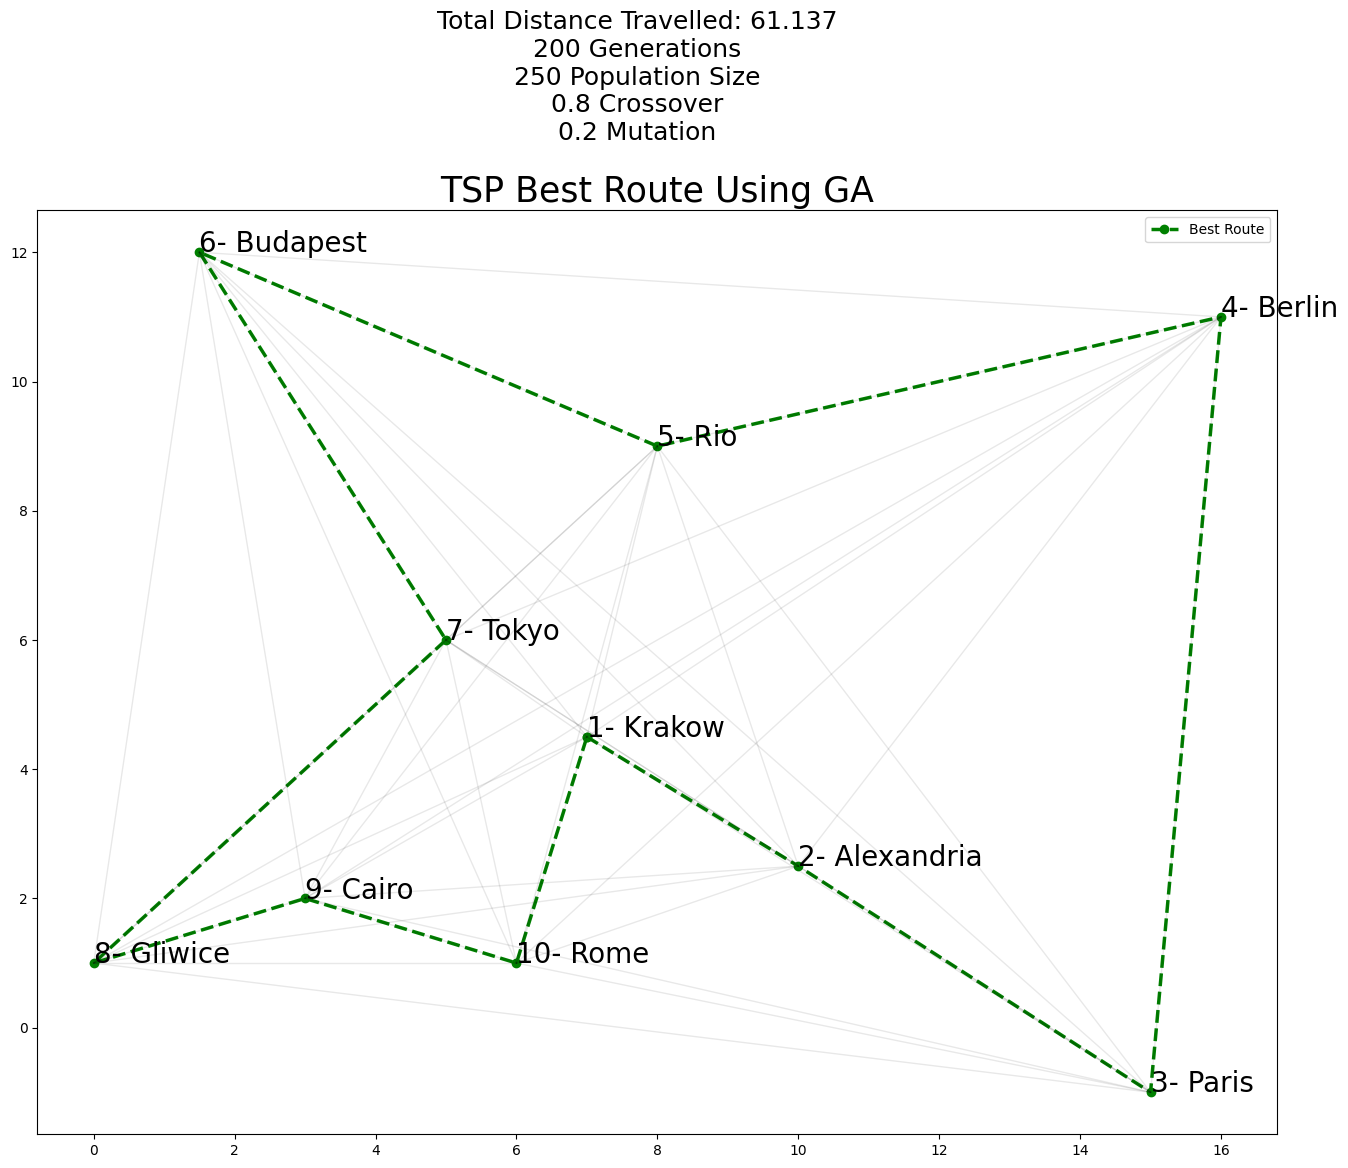

In [ ]:
fig, ax = plt.subplots()
ax.plot(x_shortest, y_shortest, '--go', label='Best Route', linewidth=2.5)
plt.legend()

for i in range(len(x)):
    for j in range(i + 1, len(x)):
        ax.plot([x[i], x[j]], [y[i], y[j]], 'k-', alpha=0.09, linewidth=1)

plt.title(label="TSP Best Route Using GA",
          fontsize=25,
          color="k")

str_params = '\n'+str(number_of_generations)+' Generations\n'+str(population_size)+' Population Size\n'+str(crossover_rate)+' Crossover\n'+str(mutation_rate)+' Mutation'
plt.suptitle("Total Distance Travelled: "+
             str(round(minimum_distance, 3)) +
             str_params, fontsize=18, y = 1.047)

for i, txt in enumerate(shortest_path):
    ax.annotate(str(i+1)+ "- " + txt, (x_shortest[i], y_shortest[i]), fontsize= 20)

fig.set_size_inches(16, 12)
# plt.grid(color='k', linestyle='dotted')
plt.savefig('solution.png')
plt.show()